In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [30]:
# Lista vacía para almacenar los dataframes
dataframes_list = []

# Bucle sobre el rango de números de archivos
for i in range(1, 11):  # Asumiendo que hay 5 archivos
    # Construir la ruta del archivo
    file_path = f'logs/wpsSimulator-{i}.csv'
    
    # Cargar el dataset
    df = pd.read_csv(file_path)
    
    # Agregar la nueva columna que indica el número del dataset
    df['Replica'] = f'R{i}'
    
    # Agregar el dataframe a la lista
    dataframes_list.append(df)

# Concatenar todos los dataframes en uno
mental_state_data = pd.concat(dataframes_list, ignore_index=True)

In [31]:
mental_state_data.columns

Index(['HappinessSadness', 'HopefulUncertainty', 'SecureInsecure', 'money',
       'health', 'timeLeftOnDay', 'newDay', 'currentSeason', 'robberyAccount',
       'purpose', 'peasantFamilyAffinity', 'peasantLeisureAffinity',
       'peasantFriendsAffinity', 'currentPeasantLeisureType',
       'currentResourceNeededType', 'currentDay', 'internalCurrentDate',
       'toPay', 'peasantKind', 'rainfallConditions',
       'peasantFamilyMinimalVital', 'peasantFamilyLandAlias',
       'currentActivity', 'farm', 'loanAmountToPay', 'tools', 'seeds',
       'waterAvailable', 'pesticidesAvailable', 'totalHarvestedWeight',
       'contractor', 'daysToWorkForOther', 'Agent', 'Emotion',
       'peasantFamilyHelper', 'haveEmotions', 'Replica'],
      dtype='object')

In [32]:
mental_state_data

,HappinessSadness,HopefulUncertainty,SecureInsecure,money,health,timeLeftOnDay,newDay,currentSeason,robberyAccount,purpose,...,waterAvailable,pesticidesAvailable,totalHarvestedWeight,contractor,daysToWorkForOther,Agent,Emotion,peasantFamilyHelper,haveEmotions,Replica
0,0.1459,0.1979,0.4279,2384756.0,100,24.0,True,NONE,0,NaN,...,2088.0,0,0.000000,NONE,0,PeasantFamily_5,True,NONE,True,R1
1,0.1459,0.1979,0.4279,2165773.0,98,24.0,True,NONE,0,NaN,...,1988.0,0,0.000000,NONE,0,PeasantFamily_4,True,NONE,False,R1
2,0.1458,0.1978,0.4278,2003954.0,91,24.0,True,NONE,0,NaN,...,1915.0,0,0.000000,NONE,0,PeasantFamily_6,True,NONE,False,R1
3,0.1458,0.1978,0.4278,2342665.0,100,24.0,True,NONE,0,NaN,...,2069.0,0,0.000000,NONE,0,PeasantFamily_2,True,NONE,True,R1
4,0.1459,0.1979,0.4279,2317214.0,100,24.0,True,NONE,0,NaN,...,2057.0,0,0.000000,NONE,0,PeasantFamily_8,True,NONE,True,R1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171322,0.9900,0.9900,0.9900,1196382.0,100,24.0,True,NONE,0,farmer,...,536.0,0,47920.906706,NONE,0,PeasantFamily_6,True,NONE,True,R10
171323,0.9900,0.9900,0.9900,1186382.0,100,24.0,True,NONE,0,farmer,...,536.0,0,47920.906706,NONE,0,PeasantFamily_6,True,NONE,True,R10
171324,1.0000,0.9699,0.9699,615730.0,96,24.0,True,NONE,0,farmer,...,1962.0,0,47364.643695,NONE,0,PeasantFamily_4,True,NONE,False,R10
171325,0.9899,0.9800,0.9800,605730.0,96,24.0,True,NONE,0,farmer,...,1962.0,0,47364.643695,NONE,0,PeasantFamily_4,True,NONE,False,R10


In [33]:
mental_state_data.to_csv('fullDataset.csv', index=False)

In [9]:
# Separating the data based on the 'haveEmotions' field (True or False)
agents_with_emotions = mental_state_data[mental_state_data['haveEmotions'] == True]
agents_without_emotions = mental_state_data[mental_state_data['haveEmotions'] == False]

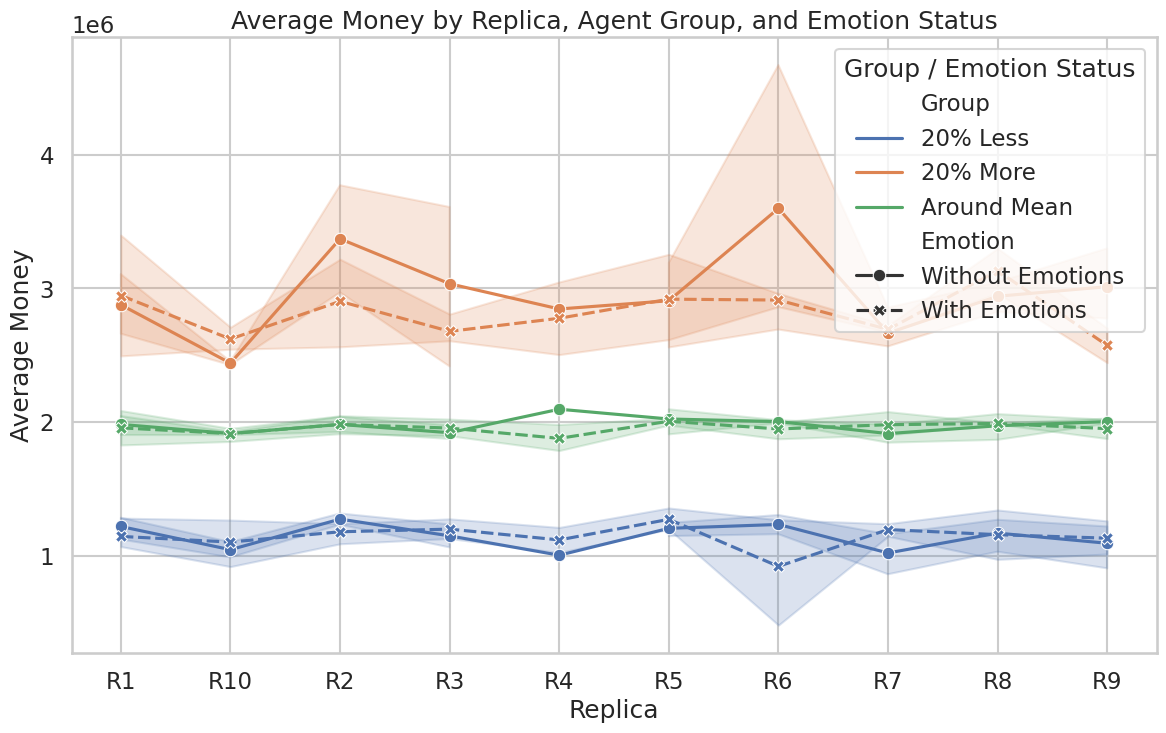

In [28]:
# Calcular el dinero inicial medio
initial_money_mean = pd.concat([agents_with_emotions, agents_without_emotions])['money'].mean()

# Calcular los umbrales para el 20% más y menos
upper_threshold = initial_money_mean * 1.2
lower_threshold = initial_money_mean * 0.8

# Función para clasificar a los agentes basada en su dinero inicial
def classify_agent(row):
    if row['money'] <= lower_threshold:
        return '20% Less'
    elif row['money'] >= upper_threshold:
        return '20% More'
    else:
        return 'Around Mean'

# Crear copias independientes de los DataFrames originales
agents_with_emotions_copy = agents_with_emotions.copy()
agents_without_emotions_copy = agents_without_emotions.copy()

# Aplicar la clasificación y añadir la columna para emociones
agents_with_emotions_copy['Group'] = agents_with_emotions_copy.apply(classify_agent, axis=1)
agents_with_emotions_copy['Emotion'] = 'With Emotions'
agents_without_emotions_copy['Group'] = agents_without_emotions_copy.apply(classify_agent, axis=1)
agents_without_emotions_copy['Emotion'] = 'Without Emotions'

# Combinar las copias de los DataFrames
combined_agents = pd.concat([agents_with_emotions_copy, agents_without_emotions_copy])

# Agrupar por 'Replica', 'Agent', 'Group', 'Emotion', y calcular la media de 'money'
avg_money = combined_agents.groupby(['Replica', 'Agent', 'Group', 'Emotion'])['money'].mean().reset_index()

# Crear el gráfico de líneas para el promedio de dinero
plt.figure(figsize=(14, 8))
sns.lineplot(data=avg_money, x='Replica', y='money', hue='Group', style='Emotion', markers=True)
plt.title('Average Money by Replica, Agent Group, and Emotion Status')
plt.xlabel('Replica')
plt.ylabel('Average Money')
plt.legend(title='Group / Emotion Status')
plt.show()

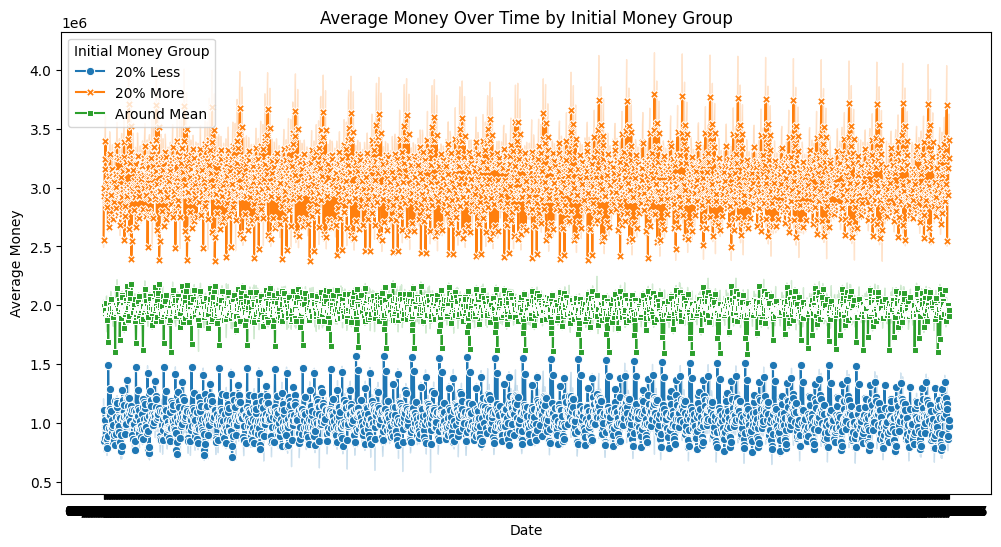

In [10]:
# Suponiendo que 'agents_with_emotions' y 'agents_without_emotions' son DataFrames que ya existen en tu entorno

agents_with_emotions_copy = agents_with_emotions.copy()
agents_without_emotions_copy = agents_without_emotions.copy()

# Determinar el dinero inicial medio de todos los agentes
initial_money_mean = pd.concat([agents_with_emotions, agents_without_emotions])['money'].mean()

# Calcular el 20% más y menos de la media
upper_threshold = initial_money_mean * 1.2
lower_threshold = initial_money_mean * 0.8

# Función para clasificar a los agentes basada en su dinero inicial
def classify_agent(row):
    if row['money'] <= lower_threshold:
        return '20% Less'
    elif row['money'] >= upper_threshold:
        return '20% More'
    else:
        return 'Around Mean'

# Aplicar la clasificación a cada agente
agents_with_emotions_copy['Group'] = agents_with_emotions_copy.apply(classify_agent, axis=1)
agents_without_emotions_copy['Group'] = agents_without_emotions_copy.apply(classify_agent, axis=1)

# Agrupar los datos por fecha y 'Group', y calcular el valor medio de 'money' para cada fecha y grupo
avg_money_with_emotions = agents_with_emotions_copy.groupby(['internalCurrentDate', 'Group'])['money'].mean().reset_index()
avg_money_without_emotions = agents_without_emotions_copy.groupby(['internalCurrentDate', 'Group'])['money'].mean().reset_index()

# Crear el gráfico de líneas para el promedio de dinero a lo largo del tiempo, separado por los grupos de dinero inicial
plt.figure(figsize=(12, 6))
sns.lineplot(x='internalCurrentDate', y='money', hue='Group', style='Group',
             data=pd.concat([avg_money_with_emotions, avg_money_without_emotions]),
             markers=True, dashes=False)
plt.title('Average Money Over Time by Initial Money Group')
plt.xlabel('Date')
plt.ylabel('Average Money')
plt.legend(title='Initial Money Group')
plt.show()

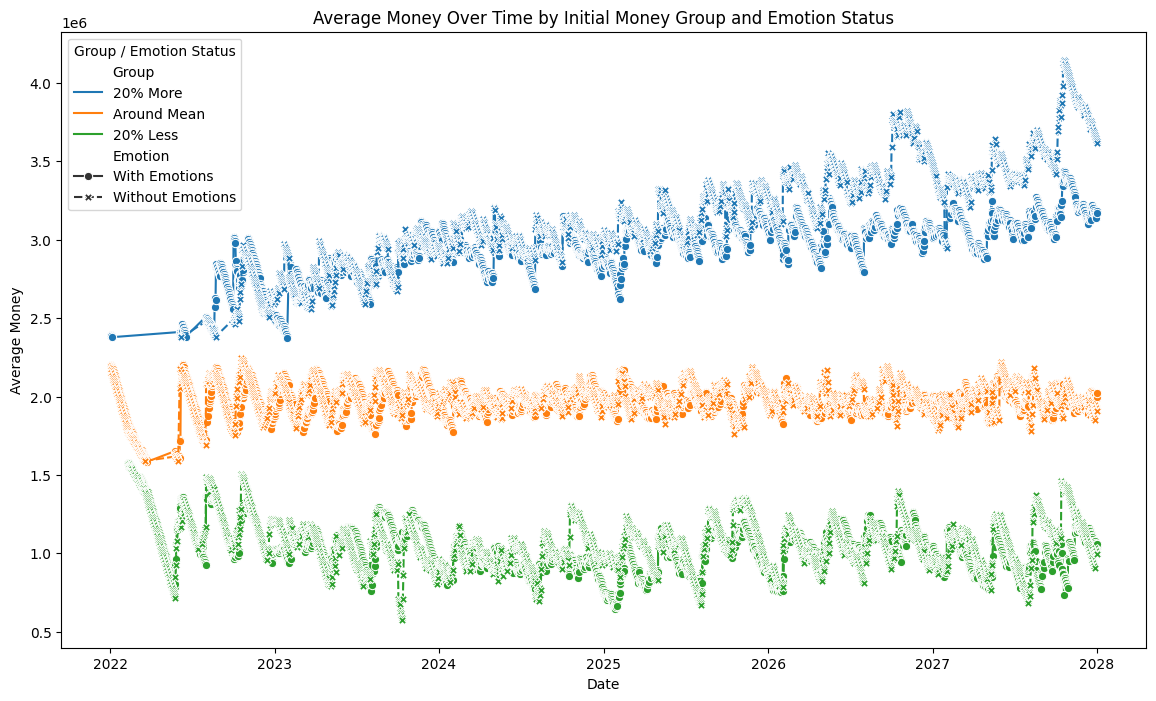

In [11]:
# Calcular el dinero inicial medio
initial_money_mean = pd.concat([agents_with_emotions, agents_without_emotions])['money'].mean()

# Calcular los umbrales para el 20% más y menos
upper_threshold = initial_money_mean * 1.2
lower_threshold = initial_money_mean * 0.8

# Función para clasificar a los agentes basada en su dinero inicial
def classify_agent(row):
    if row['money'] <= lower_threshold:
        return '20% Less'
    elif row['money'] >= upper_threshold:
        return '20% More'
    else:
        return 'Around Mean'

# Crear copias independientes de los DataFrames originales
agents_with_emotions_copy = agents_with_emotions.copy()
agents_without_emotions_copy = agents_without_emotions.copy()

# Aplicar la clasificación y añadir la columna para emociones
agents_with_emotions_copy['Group'] = agents_with_emotions_copy.apply(classify_agent, axis=1)
agents_with_emotions_copy['Emotion'] = 'With Emotions'
agents_without_emotions_copy['Group'] = agents_without_emotions_copy.apply(classify_agent, axis=1)
agents_without_emotions_copy['Emotion'] = 'Without Emotions'

# Combinar las copias de los DataFrames
combined_agents = pd.concat([agents_with_emotions_copy, agents_without_emotions_copy])

# Convertir 'internalCurrentDate' a formato de fecha
combined_agents['internalCurrentDate'] = pd.to_datetime(combined_agents['internalCurrentDate'], format='%d/%m/%Y')

# Agrupar por fecha, 'Group' y 'Emotion', y calcular la media de 'money'
avg_money = combined_agents.groupby(['internalCurrentDate', 'Group', 'Emotion'])['money'].mean().reset_index()

# Definir una paleta de estilos personalizada para 'Emotion'
style_palette = {'With Emotions': '.', 'Without Emotions': '--'}

# Crear el gráfico de líneas para el promedio de dinero a lo largo del tiempo
plt.figure(figsize=(14, 8))
sns.lineplot(x='internalCurrentDate', y='money', hue='Group', style='Emotion', 
             data=avg_money, markers=True)
plt.title('Average Money Over Time by Initial Money Group and Emotion Status')
plt.xlabel('Date')
plt.ylabel('Average Money')
plt.legend(title='Group / Emotion Status')
plt.show()

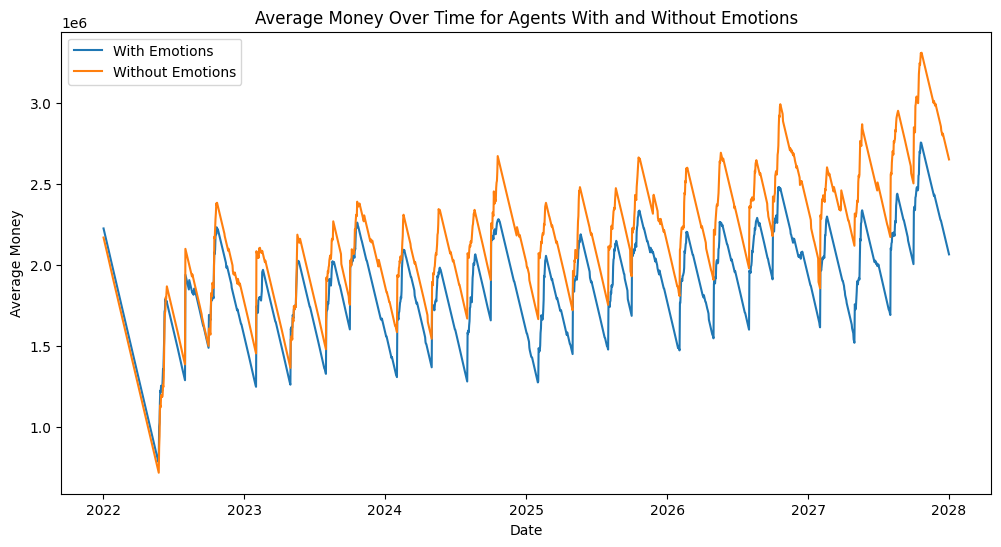

In [12]:
# Creating explicit copies of the dataframes to avoid SettingWithCopyWarning
agents_with_emotions_copy = agents_with_emotions.copy()
agents_without_emotions_copy = agents_without_emotions.copy()

# Parsing the 'internalCurrentDate' column with the correct format in the copies
agents_with_emotions_copy['internalCurrentDate'] = pd.to_datetime(agents_with_emotions_copy['internalCurrentDate'], format='%d/%m/%Y')
agents_without_emotions_copy['internalCurrentDate'] = pd.to_datetime(agents_without_emotions_copy['internalCurrentDate'], format='%d/%m/%Y')

# Grouping data by date and calculating the mean 'money' value for each date in the copies
avg_money_with_emotions = agents_with_emotions_copy.groupby('internalCurrentDate')['money'].mean()
avg_money_without_emotions = agents_without_emotions_copy.groupby('internalCurrentDate')['money'].mean()

# Re-plotting the average money over time for both datasets
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_money_with_emotions, label='With Emotions')
sns.lineplot(data=avg_money_without_emotions, label='Without Emotions')
plt.title('Average Money Over Time for Agents With and Without Emotions')
plt.xlabel('Date')
plt.ylabel('Average Money')
plt.legend()
plt.show()

In [13]:
# Since the user is having an issue with plotting the data on their local machine, 
# let's check the range of dates in both datasets to ensure we have data beyond October.

# Checking the date range for agents with emotions
date_range_with_emotions = (
    agents_with_emotions_copy['internalCurrentDate'].min(), 
    agents_with_emotions_copy['internalCurrentDate'].max()
)

# Checking the date range for agents without emotions
date_range_without_emotions = (
    agents_without_emotions_copy['internalCurrentDate'].min(), 
    agents_without_emotions_copy['internalCurrentDate'].max()
)

date_range_with_emotions, date_range_without_emotions


((Timestamp('2022-01-02 00:00:00'), Timestamp('2028-01-01 00:00:00')),
 (Timestamp('2022-01-02 00:00:00'), Timestamp('2028-01-01 00:00:00')))

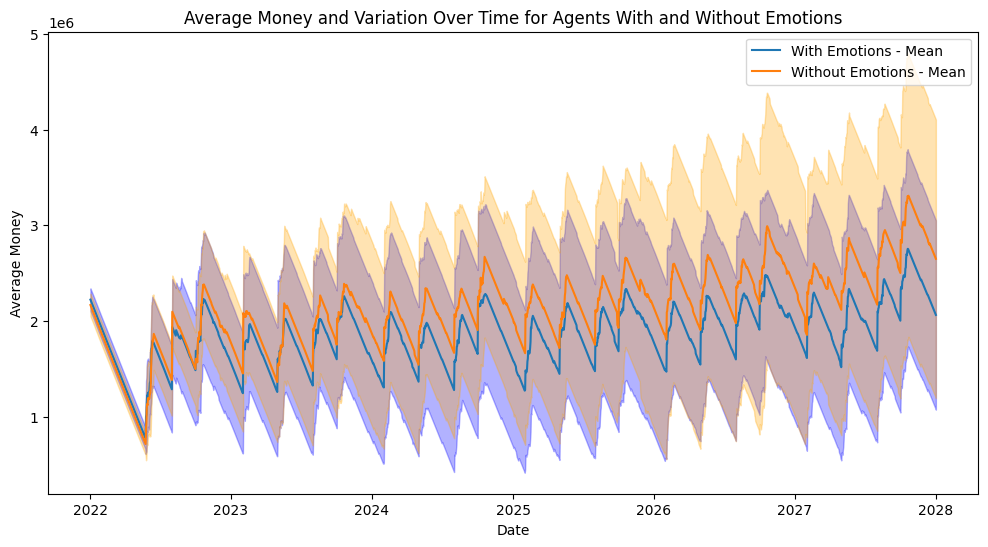

In [14]:
# Calculando la media y la desviación estándar del dinero por fecha
stats_con_emociones = agents_with_emotions_copy.groupby('internalCurrentDate')['money'].agg(['mean', 'std'])
stats_sin_emociones = agents_without_emotions_copy.groupby('internalCurrentDate')['money'].agg(['mean', 'std'])

# Creando el gráfico
plt.figure(figsize=(12, 6))

# Lineplot para la media
sns.lineplot(data=stats_con_emociones['mean'], label='With Emotions - Mean')
sns.lineplot(data=stats_sin_emociones['mean'], label='Without Emotions - Mean')

# Área sombreada para la desviación estándar (variación)
plt.fill_between(stats_con_emociones.index, 
                 stats_con_emociones['mean'] - stats_con_emociones['std'], 
                 stats_con_emociones['mean'] + stats_con_emociones['std'], 
                 color='blue', alpha=0.3)
plt.fill_between(stats_sin_emociones.index, 
                 stats_sin_emociones['mean'] - stats_sin_emociones['std'], 
                 stats_sin_emociones['mean'] + stats_sin_emociones['std'], 
                 color='orange', alpha=0.3)

# Detalles del gráfico
plt.title('Average Money and Variation Over Time for Agents With and Without Emotions')
plt.xlabel('Date')
plt.ylabel('Average Money')
plt.legend()
plt.show()


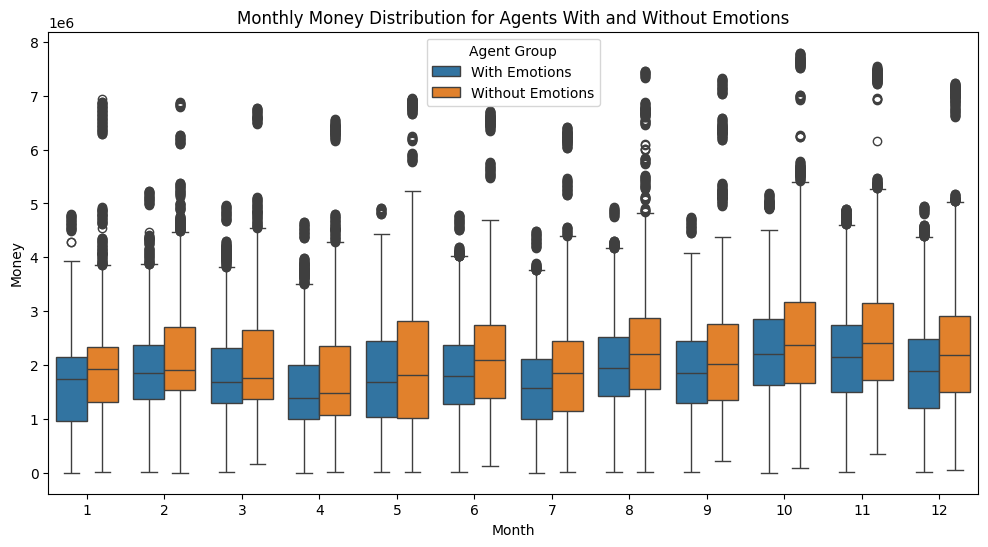

In [15]:
# Asegurándonos de que 'internalCurrentDate' está en formato de fecha
agents_with_emotions_copy['internalCurrentDate'] = pd.to_datetime(agents_with_emotions_copy['internalCurrentDate'], format='%d/%m/%Y')
agents_without_emotions_copy['internalCurrentDate'] = pd.to_datetime(agents_without_emotions_copy['internalCurrentDate'], format='%d/%m/%Y')

# Extrayendo el mes de la fecha
agents_with_emotions_copy['Month'] = agents_with_emotions_copy['internalCurrentDate'].dt.month
agents_without_emotions_copy['Month'] = agents_without_emotions_copy['internalCurrentDate'].dt.month

# Combinando ambos datasets para el boxplot
combined_data = pd.concat([agents_with_emotions_copy.assign(Group='With Emotions'), 
                           agents_without_emotions_copy.assign(Group='Without Emotions')])

# Creando el gráfico de bigotes
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='money', hue='Group', data=combined_data)
plt.title('Monthly Money Distribution for Agents With and Without Emotions')
plt.xlabel('Month')
plt.ylabel('Money')
plt.legend(title='Agent Group')
plt.show()


In [16]:
import pandas as pd
from scipy.stats import f_oneway

# Cargar los datos
data = pd.read_csv(file_path)

# Asegurarse de que los tipos de datos son los correctos
data['haveEmotions'] = data['haveEmotions'].astype(bool)
data['money'] = data['money'].astype(float)

# Separar los datos en grupos
group_with_emotions = data[data['haveEmotions']]['money']
group_without_emotions = data[~data['haveEmotions']]['money']

# Realizar ANOVA
anova_result = f_oneway(group_with_emotions, group_without_emotions)
print(anova_result)

F_onewayResult(statistic=209.39894167248053, pvalue=3.498008299672967e-47)


El resultado del ANOVA que proporcionaste indica un valor F muy elevado de aproximadamente 2486.69 y un valor p de 0.0. Este valor p es tan pequeño que se redondea a cero en la salida, lo cual sugiere que es extremadamente improbable que tal diferencia extrema en las medias de dinero entre los agentes con emociones y sin emociones sea debido al azar.

Aquí hay una interpretación más detallada de los resultados:

    Estadístico F: El valor de F es una medida de cuánto varían los grupos entre sí en comparación con la variación dentro de los grupos. Un valor de F muy alto, como el que obtuviste, sugiere que hay una diferencia significativa en la variabilidad entre los grupos en comparación con la variabilidad dentro de los grupos.

    Valor p: El valor p te dice la probabilidad de obtener al menos una diferencia tan extrema como la observada, bajo la suposición de que la hipótesis nula es cierta (es decir, que no hay diferencias entre los grupos). Un valor p cercano o igual a cero indica que la hipótesis nula puede ser rechazada con un alto nivel de confianza.

En resumen, los resultados de tu ANOVA indican que existe una diferencia estadísticamente significativa en la cantidad de dinero entre agentes que tienen emociones y aquellos que no. Estos resultados te permiten rechazar la hipótesis nula y concluir que el factor "tener emociones" tiene un efecto significativo en la variable "dinero" en tu conjunto de datos.

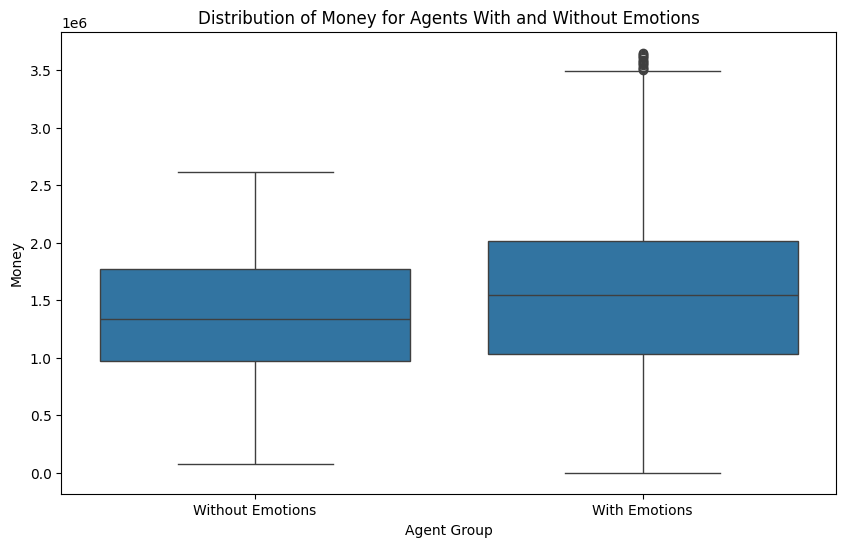

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegúrate de tener los datos cargados en un DataFrame de pandas
data = pd.read_csv(file_path)

# Convertir 'haveEmotions' a una variable categórica para la visualización
data['haveEmotions'] = data['haveEmotions'].map({True: 'With Emotions', False: 'Without Emotions'})

# Crear un gráfico de caja para visualizar los hallazgos del ANOVA
plt.figure(figsize=(10, 6))
sns.boxplot(x='haveEmotions', y='money', data=data)
plt.title('Distribution of Money for Agents With and Without Emotions')
plt.ylabel('Money')
plt.xlabel('Agent Group')
plt.show()

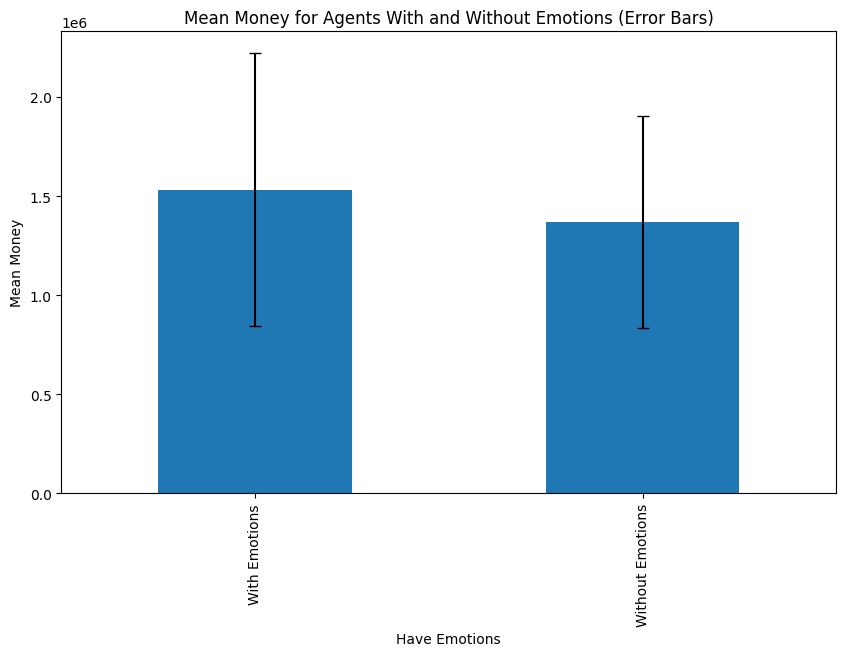

In [18]:
import numpy as np

# Calcular las medias y los errores estándar
means = data.groupby('haveEmotions')['money'].mean()
errors = data.groupby('haveEmotions')['money'].std()

# Generar gráfico de barras de errores
plt.figure(figsize=(10, 6))
means.plot(kind='bar', yerr=errors, capsize=4)
plt.title('Mean Money for Agents With and Without Emotions (Error Bars)')
plt.xlabel('Have Emotions')
plt.ylabel('Mean Money')
plt.show()

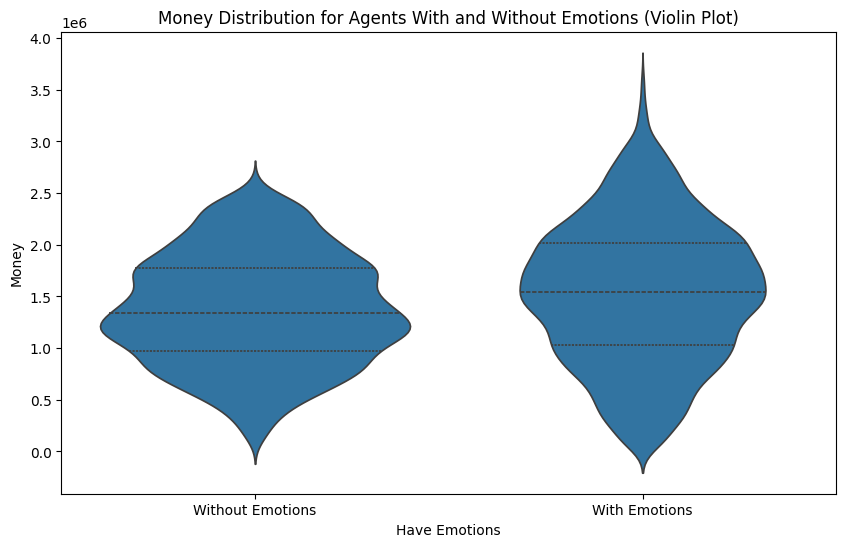

In [19]:
# Generar gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(x='haveEmotions', y='money', data=data, inner='quartile')
plt.title('Money Distribution for Agents With and Without Emotions (Violin Plot)')
plt.xlabel('Have Emotions')
plt.ylabel('Money')
plt.show()

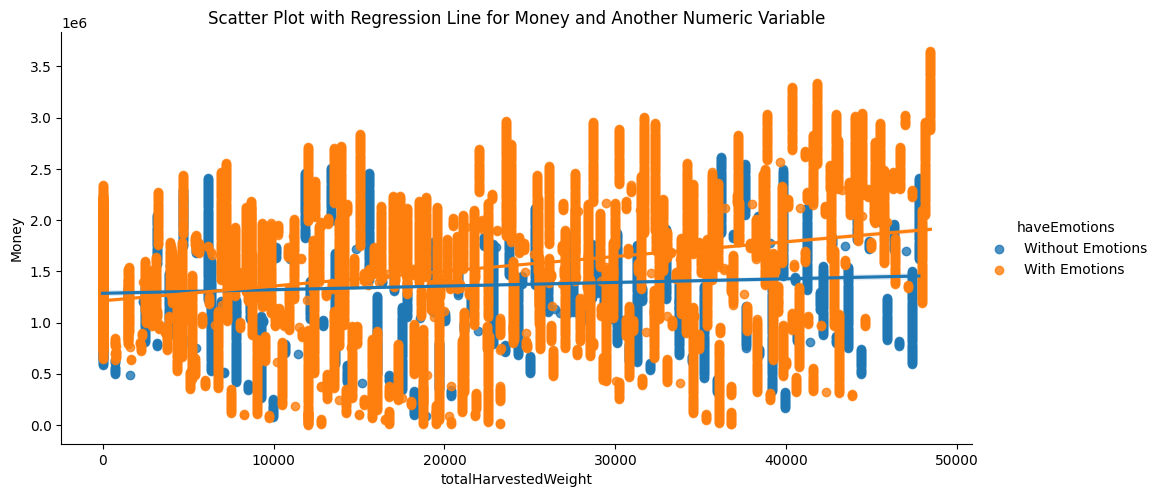

In [20]:
# Asumiendo que 'other_numeric_variable' es otra variable numérica de interés
sns.lmplot(x='totalHarvestedWeight', y='money', hue='haveEmotions', data=data, aspect=2)
plt.title('Scatter Plot with Regression Line for Money and Another Numeric Variable')
plt.xlabel('totalHarvestedWeight')
plt.ylabel('Money')
plt.show()

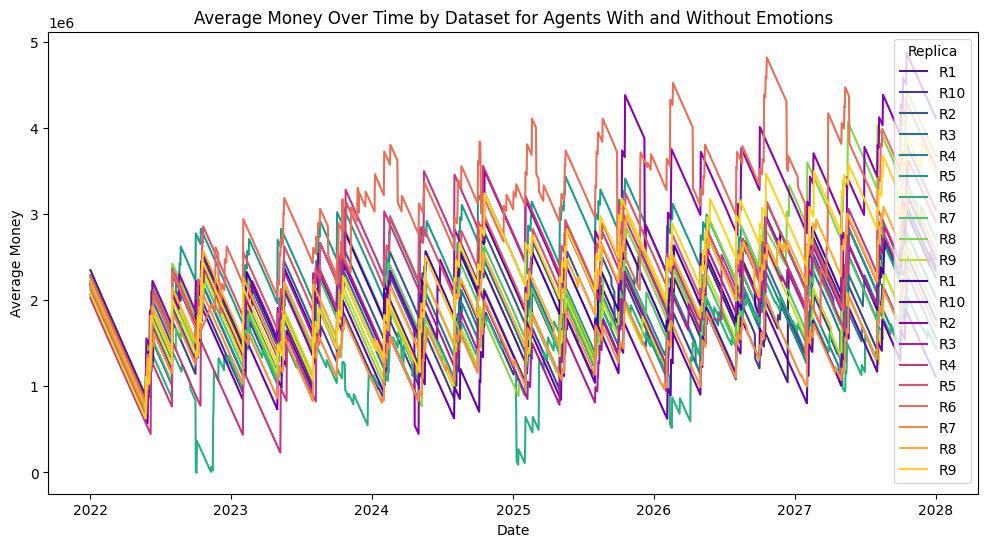

In [23]:
# Suponiendo que 'agents_with_emotions' y 'agents_without_emotions' ya contienen la columna 'Dataset'
# y están cargados correctamente con todos los datasets combinados.

# Crear copias explícitas de los dataframes para evitar SettingWithCopyWarning
agents_with_emotions_copy = agents_with_emotions.copy()
agents_without_emotions_copy = agents_without_emotions.copy()

# Parsear la columna 'internalCurrentDate' con el formato correcto en las copias
agents_with_emotions_copy['internalCurrentDate'] = pd.to_datetime(agents_with_emotions_copy['internalCurrentDate'], format='%d/%m/%Y')
agents_without_emotions_copy['internalCurrentDate'] = pd.to_datetime(agents_without_emotions_copy['internalCurrentDate'], format='%d/%m/%Y')

# Agrupar los datos por 'Dataset' y 'internalCurrentDate', y calcular el valor medio de 'money' para cada fecha y dataset
avg_money_with_emotions = agents_with_emotions_copy.groupby(['Replica', 'internalCurrentDate'])['money'].mean().reset_index()
avg_money_without_emotions = agents_without_emotions_copy.groupby(['Replica', 'internalCurrentDate'])['money'].mean().reset_index()

# Crear un gráfico de línea para el promedio de dinero a lo largo del tiempo para ambos conjuntos de datos,
# diferenciando cada dataset
plt.figure(figsize=(12, 6))
sns.lineplot(x='internalCurrentDate', y='money', hue='Replica', data=avg_money_with_emotions, palette='viridis', legend='full')
sns.lineplot(x='internalCurrentDate', y='money', hue='Replica', data=avg_money_without_emotions, palette='plasma', legend='full')
plt.title('Average Money Over Time by Dataset for Agents With and Without Emotions')
plt.xlabel('Date')
plt.ylabel('Average Money')
plt.legend(title='Replica')
plt.show()


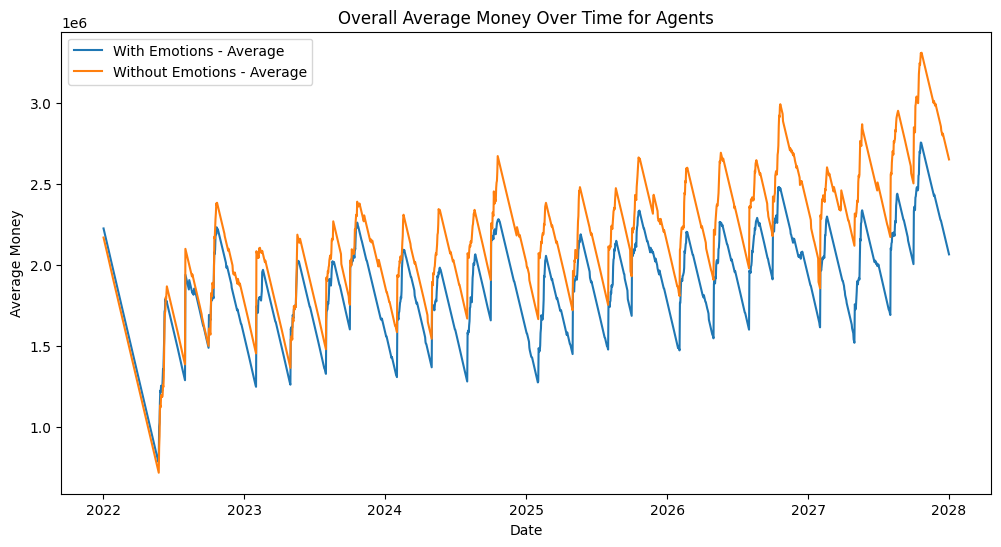

In [24]:
# Calcular la media de 'money' para cada fecha, promediando sobre todas las repeticiones del experimento
avg_money_with_emotions_overall = agents_with_emotions_copy.groupby('internalCurrentDate')['money'].mean()
avg_money_without_emotions_overall = agents_without_emotions_copy.groupby('internalCurrentDate')['money'].mean()

# Crear el gráfico de líneas para las medias
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_money_with_emotions_overall, label='With Emotions - Average')
sns.lineplot(data=avg_money_without_emotions_overall, label='Without Emotions - Average')
plt.title('Overall Average Money Over Time for Agents')
plt.xlabel('Date')
plt.ylabel('Average Money')
plt.legend()
plt.show()


KeyboardInterrupt: 

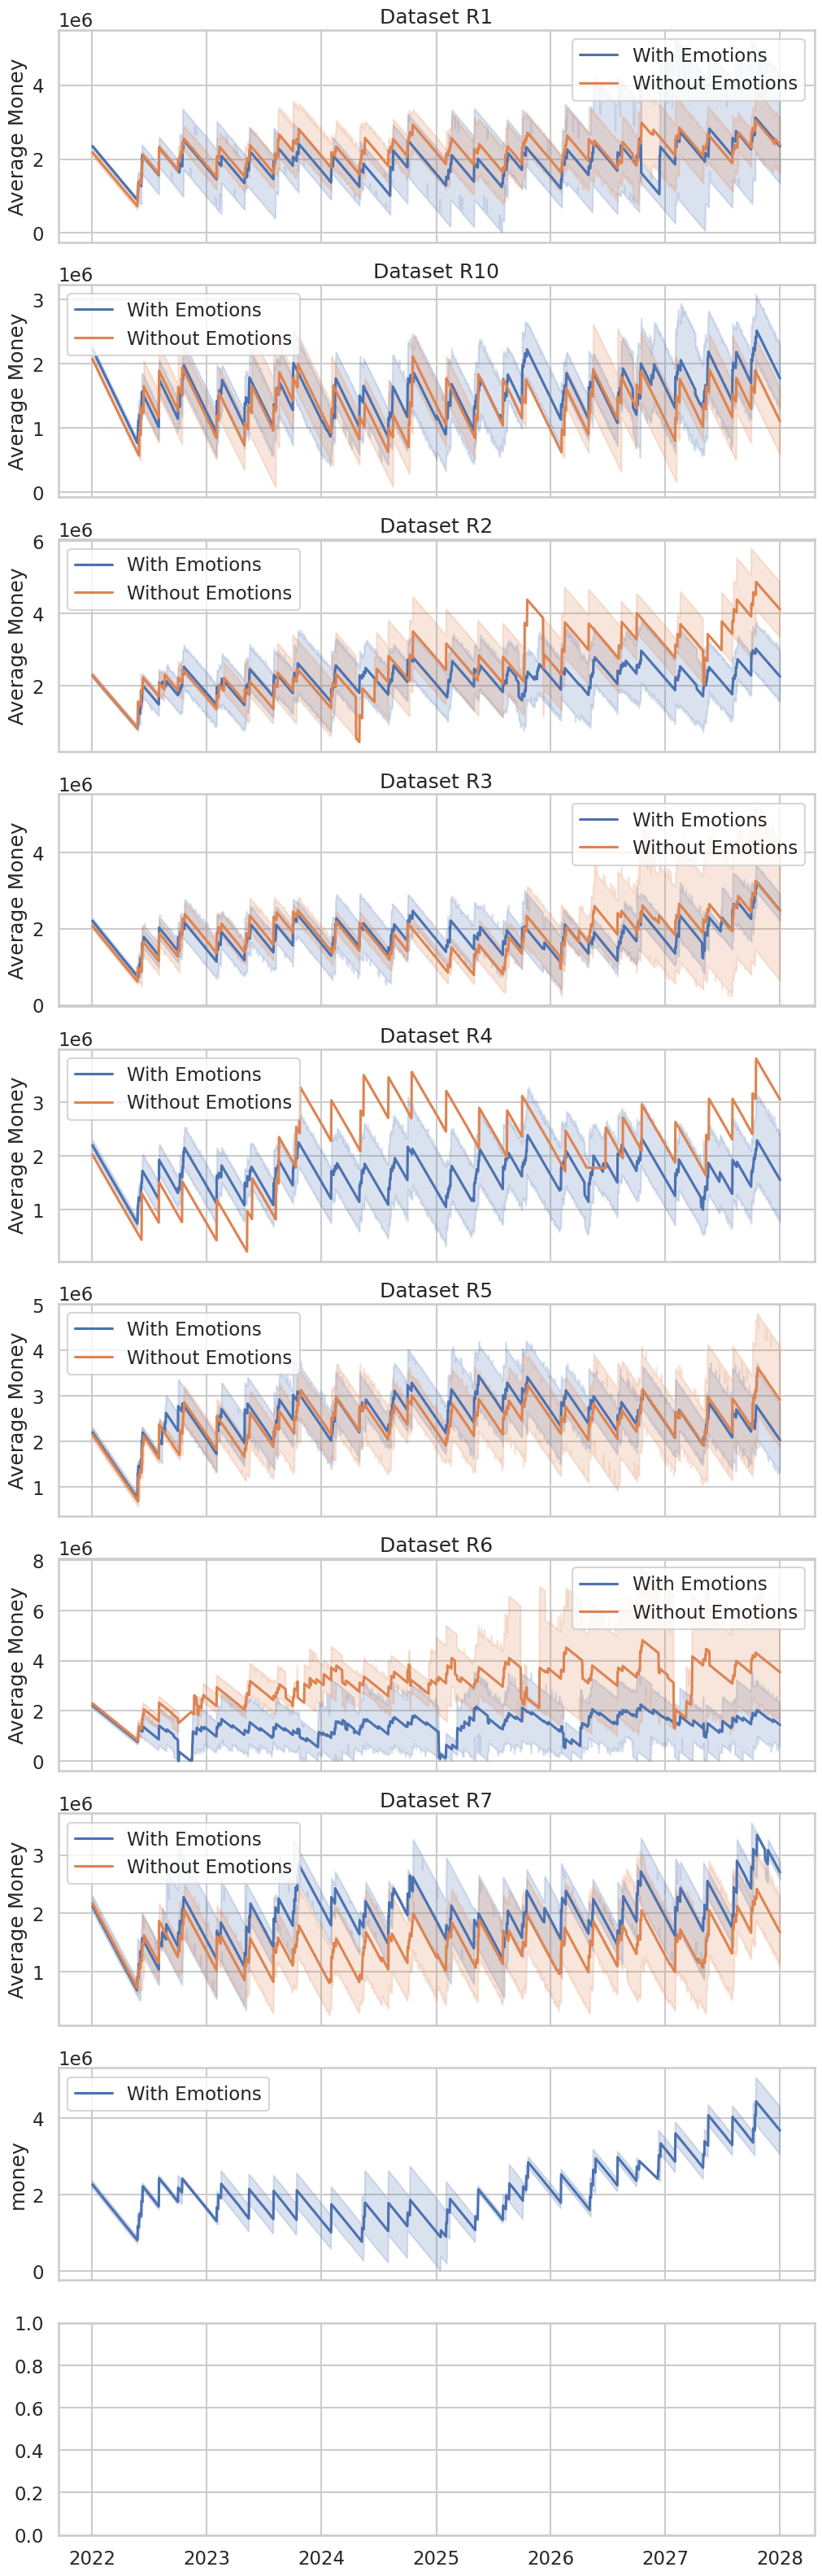

In [26]:
# Establecer el estilo y el contexto de los gráficos
sns.set(style="whitegrid", context="talk")

# Definir el número de repeticiones y crear un objeto de figura y ejes con subtramas
num_datasets = agents_with_emotions_copy['Replica'].nunique()
fig, axes = plt.subplots(num_datasets, 1, figsize=(12, num_datasets * 4), sharex=True)

# Bucle sobre cada repetición del experimento y crear una línea de trama para cada una
for i, dataset in enumerate(sorted(agents_with_emotions_copy['Replica'].unique()), start=1):
    sns.lineplot(ax=axes[i-1],
                 x='internalCurrentDate',
                 y='money',
                 data=agents_with_emotions_copy[agents_with_emotions_copy['Replica'] == dataset],
                 label='With Emotions')
    sns.lineplot(ax=axes[i-1],
                 x='internalCurrentDate',
                 y='money',
                 data=agents_without_emotions_copy[agents_without_emotions_copy['Replica'] == dataset],
                 label='Without Emotions')
    axes[i-1].set_title(f'Dataset {dataset}')
    axes[i-1].set_ylabel('Average Money')

# Configurar las etiquetas y leyendas del eje x
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()